In [1]:
import matplotlib
import pandas as pd
from sklearn.datasets import load_wine

wine  = load_wine()

print("Dataset Size : ", wine.data.shape)

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df["WineType"] = [wine.target_names[typ] for typ in wine.target]

wine_df.head()

Dataset Size :  (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [2]:
avg_wine_df = wine_df.groupby(by="WineType").mean().reset_index()

avg_wine_df

,WineType,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,class_0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,class_1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,class_2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [3]:
#Example 1: Secondary Y-Axis
#The below code imports the Matplotlib library and creates a new figure object with a size of 10x6 inches. 
#It then creates three bar charts with heights 
#corresponding to the "flavanoids", "magnesium", and "proline" columns of average wine dataframe.

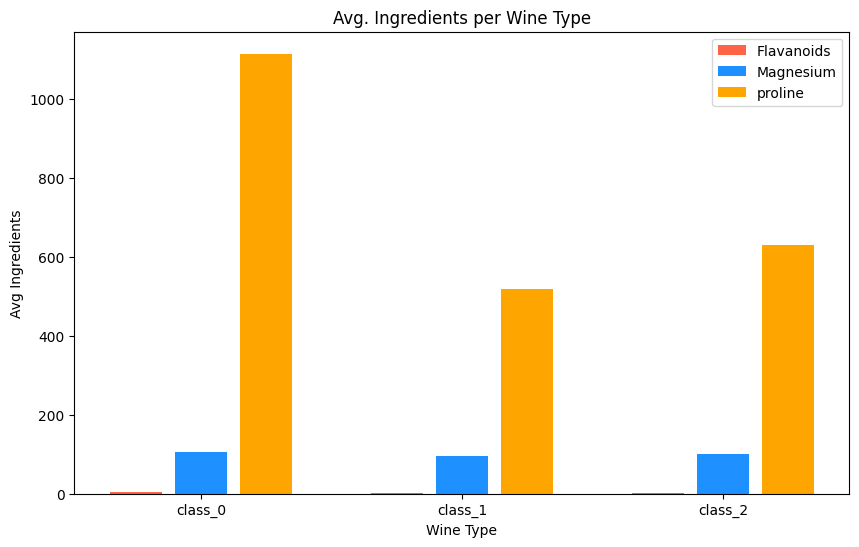

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

plt.bar(x=[0,4,8], height=avg_wine_df["flavanoids"], color="tomato", label="Flavanoids");
plt.bar(x=[1,5,9], height=avg_wine_df["magnesium"], color="dodgerblue", label="Magnesium");
plt.bar(x=[2,6,10], height=avg_wine_df["proline"], color="orange", label="proline");

plt.xticks([1,5,9], avg_wine_df.WineType);

plt.xlabel("Wine Type")
plt.ylabel("Avg Ingredients")
plt.title("Avg. Ingredients per Wine Type")
plt.legend(loc="best");

In [5]:
#a second y-axis is added to the plot using the "twinx()" function and another bar chart is created for "magnesium" with a different color and label. As we can see, in order to create a secondary y-axis,
#we need to use "twinx()" function which creates another axes object whose X-axis is same as first but has new Y-axis on right side.

#Finally, a legend is added to the plot using the "legend()" function, and a title is set using the "title()" function. 
#This code creates a plot that compares the average levels of flavanoids and magnesium 
#across different types of wine, with two y-axes for each bar chart.

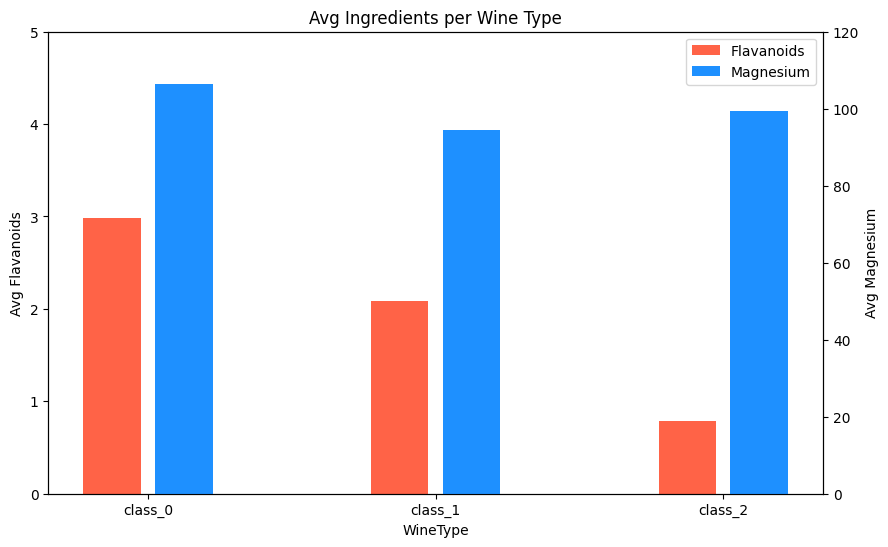

In [6]:
import matplotlib.pyplot as plt

fig, ax_main = plt.subplots(figsize=(10,6))

bar1 = ax_main.bar(x=[0,4,8], height=avg_wine_df["flavanoids"], color="tomato", label="Flavanoids");
ax_main.set_xlabel("WineType")
ax_main.set_ylabel("Avg Flavanoids");
ax_main.set_ylim(0,5);
ax_main.set_xticks([0.5, 4.5, 8.5],avg_wine_df.WineType)

ax2 = ax_main.twinx()
bar2 = ax2.bar(x=[1,5,9], height=avg_wine_df["magnesium"], color="dodgerblue", label="Magnesium");
ax2.set_ylabel("Avg Magnesium");
ax2.set_ylim(0,120);


plt.legend(loc="best", handles=[bar1, bar2])
plt.title("Avg Ingredients per Wine Type");

In [7]:
#Below, we have created another example demonstrating how to create secondary Y-axis using matplotlib. 
#This time, we have created two secondary Y axes, one to represent "magnesium" and another for "proline".

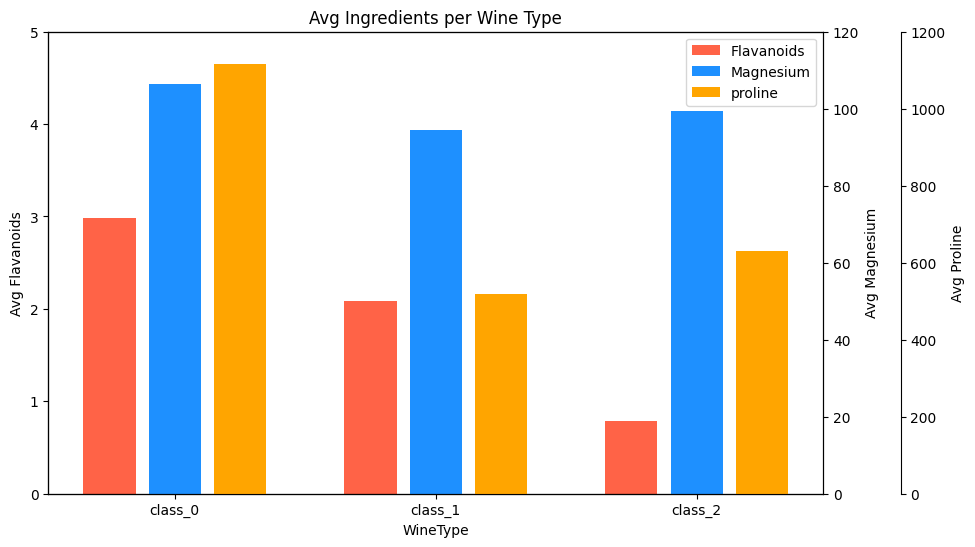

In [8]:
import matplotlib.pyplot as plt

fig, ax_main = plt.subplots(figsize=(10,6))

bar1 = ax_main.bar(x=[0,4,8], height=avg_wine_df["flavanoids"], color="tomato", label="Flavanoids");
ax_main.set_xlabel("WineType")
ax_main.set_ylabel("Avg Flavanoids");
ax_main.set_ylim(0,5);
ax_main.set_xticks([1, 5, 9],avg_wine_df.WineType)

ax2 = ax_main.twinx()
bar2 = ax2.bar(x=[1,5,9], height=avg_wine_df["magnesium"], color="dodgerblue", label="Magnesium");
ax2.set_ylabel("Avg Magnesium");
ax2.set_ylim(0,120);

ax3 = ax_main.twinx()
bar3 = ax3.bar(x=[2,6,10], height=avg_wine_df["proline"], color="orange", label="proline");
ax3.spines.right.set_position(("axes", 1.1));
ax3.set_ylabel("Avg Proline");
ax3.set_ylim(0,1200);

plt.legend(loc="best", handles=[bar1, bar2, bar3])
plt.title("Avg Ingredients per Wine Type");


In [9]:
#Below, we have recreated our previous example but tried to improve look of the chart by introducing theme to the chart.
#We also modified tick labels to align ticks of all 3 Y axes.

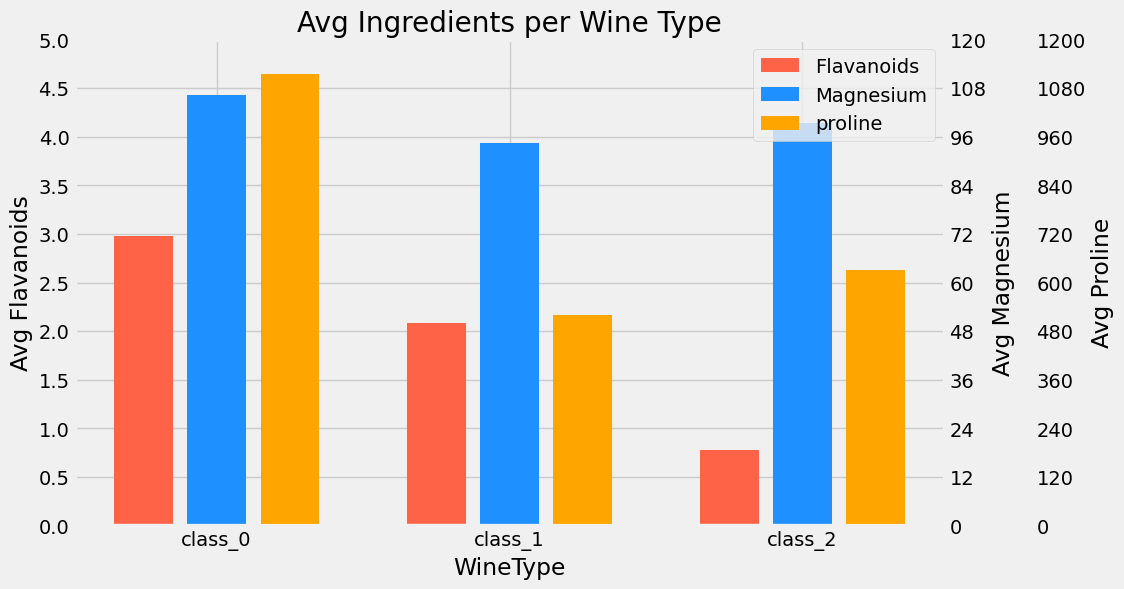

In [10]:
import matplotlib.pyplot as plt
import numpy as np

with plt.style.context("fivethirtyeight"):
    fig, ax_main = plt.subplots(figsize=(10,6))

    bar1 = ax_main.bar(x=[0,4,8], height=avg_wine_df["flavanoids"], color="tomato", label="Flavanoids");
    ax_main.set_xlabel("WineType")
    ax_main.set_ylabel("Avg Flavanoids");
    ax_main.set_ylim(0,5);
    ax_main.set_xticks([1, 5, 9],avg_wine_df.WineType);
    ax_main.set_yticks(np.arange(0,5.1,0.5), np.arange(0,5.1,0.5));

    ax2 = ax_main.twinx()
    bar2 = ax2.bar(x=[1,5,9], height=avg_wine_df["magnesium"], color="dodgerblue", label="Magnesium");
    ax2.set_ylabel("Avg Magnesium");
    ax2.set_ylim(0,120);
    ax2.grid(visible=False);
    ax2.set_yticks(np.arange(0,121,12), np.arange(0,121,12));

    ax3 = ax_main.twinx()
    bar3 = ax3.bar(x=[2,6,10], height=avg_wine_df["proline"], color="orange", label="proline");
    ax3.spines.right.set_position(("axes", 1.1));
    ax3.set_ylabel("Avg Proline");
    ax3.set_ylim(0,1200);
    ax3.grid(visible=False);
    ax3.set_yticks(np.arange(0,1201,120), np.arange(0,1201,120));

    plt.legend(loc="best", handles=[bar1, bar2, bar3])
    plt.title("Avg Ingredients per Wine Type");


In [11]:
#Example 2: Secondary X Axis
#In this section, we have explained how to create a secondary X-axis using matplotlib.

#Below, we have again created our earlier bar chart example but have reversed X and Y axis data. 
#As we can see from resulted bar chart, the wine type is represented on Y axis, and average values of ingredients are on X axis. 
#We'll now try to solve same scale problem by introducing a secondary X axis for "magnesium" and "proline".

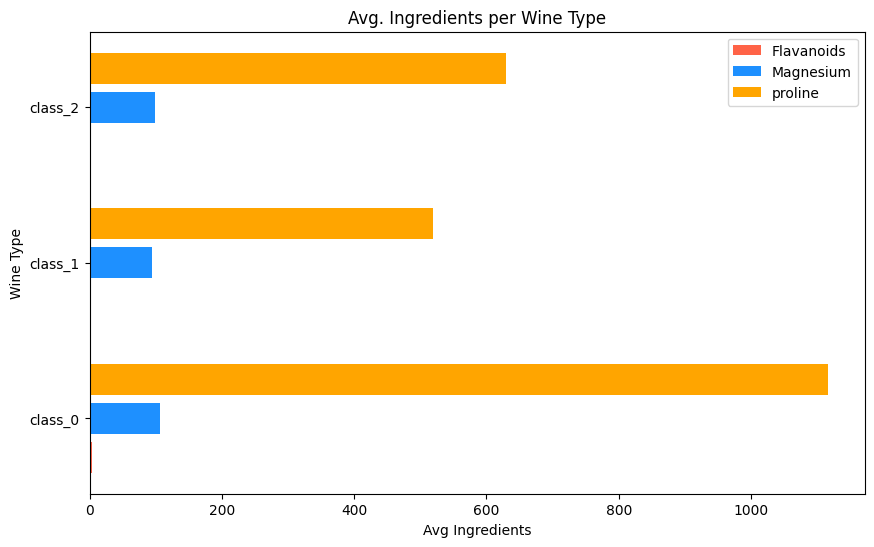

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

plt.barh(y=[0,4,8], width=avg_wine_df["flavanoids"], color="tomato", label="Flavanoids");
plt.barh(y=[1,5,9], width=avg_wine_df["magnesium"], color="dodgerblue", label="Magnesium");
plt.barh(y=[2,6,10], width=avg_wine_df["proline"], color="orange", label="proline");

plt.yticks([1,5,9], avg_wine_df.WineType);

plt.ylabel("Wine Type")
plt.xlabel("Avg Ingredients")
plt.title("Avg. Ingredients per Wine Type")
plt.legend(loc="best");

In [13]:
#Below, we have created chart where we have added 2 secondary X axes. We have used the method named "twiny()" to add 
#secondary X axis to represent values of ingredients "magnesium" and "proline". 
#The majority of the code is same as earlier with only change that we are adding a new X axis using 'twiny()' function.

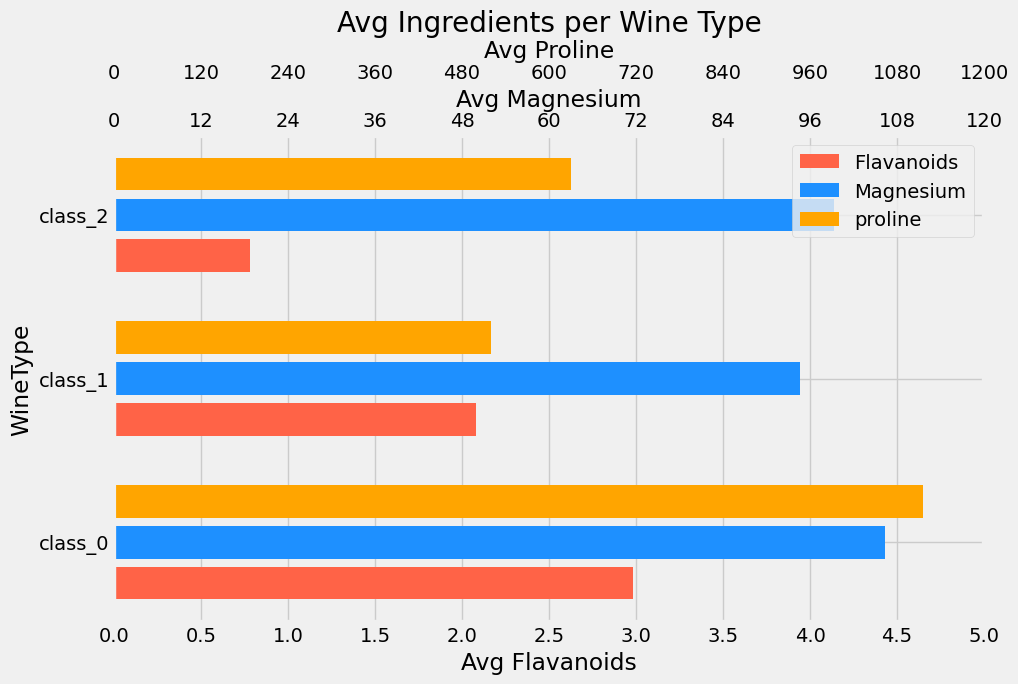

In [14]:
import matplotlib.pyplot as plt
import numpy as np

with plt.style.context("fivethirtyeight"):
    fig, ax_main = plt.subplots(figsize=(10,6))

    bar1 = ax_main.barh(y=[0,4,8], width=avg_wine_df["flavanoids"], color="tomato", label="Flavanoids");
    ax_main.set_ylabel("WineType")
    ax_main.set_xlabel("Avg Flavanoids");
    ax_main.set_xlim(0,5);
    ax_main.set_yticks([1, 5, 9],avg_wine_df.WineType);
    ax_main.set_xticks(np.arange(0,5.1,0.5), np.arange(0,5.1,0.5));

    ax2 = ax_main.twiny()
    bar2 = ax2.barh(y=[1,5,9], width=avg_wine_df["magnesium"], color="dodgerblue", label="Magnesium");
    ax2.set_xlabel("Avg Magnesium");
    ax2.set_xlim(0,120);
    ax2.grid(visible=False);
    ax2.set_xticks(np.arange(0,121,12), np.arange(0,121,12));

    ax3 = ax_main.twiny()
    bar3 = ax3.barh(y=[2,6,10], width=avg_wine_df["proline"], color="orange", label="proline");
    ax3.spines.top.set_position(("axes", 1.1));
    ax3.set_xlabel("Avg Proline");
    ax3.set_xlim(0,1200);
    ax3.grid(visible=False);
    ax3.set_xticks(np.arange(0,1201,120), np.arange(0,1201,120));

    plt.legend(loc="best", handles=[bar1, bar2, bar3])
    plt.title("Avg Ingredients per Wine Type");

In [15]:
#twinx() - Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right).
#twiny() -Create a new Axes with an invisible y-axis and an independent x-axis positioned opposite to the original one (i.e. at top)